#  Homework #1
 Work to be done in this Jupyter Notebook and .pynb file turned in.   
 For full credit, all work must be shown.  
 Helpful Pandas Documentation: https://pandas.pydata.org/pandas-docs/stable/

### 1. Download Kaggle Titanic Data
https://www.kaggle.com/c/titanic/data

In [1]:
#pip install s3fs

In [2]:
import s3fs
import pandas as pd
import numpy as np
import boto3
import matplotlib.pyplot as plot

### 2. Create a Pandas DataFrame from the train.csv file

In [3]:
df = pd.read_csv('s3://unh/Fall2020/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. How many rows are in the DataFrame ?

In [4]:
rows,cols = df.shape
print("Num of rows in given DataFrame: ",rows)
print("Num of rows in given DataFrame: ",df.shape[0])

Num of rows in given DataFrame:  891
Num of rows in given DataFrame:  891


### 4. Using pandas, determine the min, max, median, and mean age of passengers in the training dataset?

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
print("Min age of passengers: ",df['Age'].describe().min())
print("Max age of passengers: ",df['Age'].describe().max())
print("Mean age of passengers: ",df['Age'].describe().mean()) #Mean value incorrect, not mathcing.


Min age of passengers:  0.42
Max age of passengers:  714.0
Mean age of passengers:  115.59632687242411


In [8]:
print("Median Age of passesngers: ",df['Age'].median())

Median Age of passesngers:  28.0


In [9]:
df['Age'].mean()

29.69911764705882

### 5. Using pandas, determine the average age and fare paid for males?  Females?

In [10]:
print("Num of null values in Age col is: ",df['Age'].isnull().sum())

Num of null values in Age col is:  177


#Null Value Treatment

C:\Users\madhuyen\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\madhuyen\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

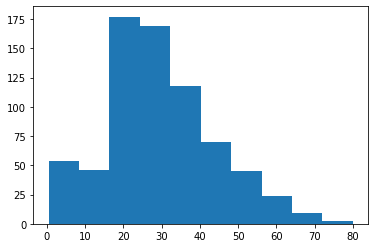

In [11]:
plot.hist(df['Age'])

In [12]:
 df['Age']=df['Age'].fillna(df['Age'].median())

In [13]:
print("Null values after Null value Treatment: ",df['Age'].isnull().sum())

Null values after Null value Treatment:  0


In [14]:
maleCount = (df['Sex'].values == 'male').sum()
femaleCount = (df['Sex'].values == 'female').sum()

print("Male & Female Count is: ", maleCount,femaleCount)

Male & Female Count is:  577 314


In [15]:
#Average Age of Male and Female
df.groupby('Sex')['Age'].mean()


Sex
female    27.929936
male      30.140676
Name: Age, dtype: float64

In [16]:
#Average Fare of Male and Female
df.groupby('Sex')['Fare'].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

### 6. Who was more likely to have survived the disaster, a male or female passenger?

In [17]:
df.groupby('Survived')['Sex'].count()

Survived
0    549
1    342
Name: Sex, dtype: int64

In [18]:
df[df['Survived']==1][df['Sex']=='male']['Sex'].count()

C:\Users\madhuyen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


109

In [19]:
df[df['Survived']==1][df['Sex']=='female']['Sex'].count()

C:\Users\madhuyen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


233

Ans:- Female survival count is more than Male